<a href="https://colab.research.google.com/github/gregbruss/market-risk/blob/main/riskAndReturns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk and Returns:
William Sharpe developed the Sharpe ratio to help investors understand the relative returns of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.


The Sharpe ratio is applied here to real financial data using the pandas library. The data is the stock market prices of Facebook and Amazon. These are benchmarked against the S&P 500, which measures the performance of the 500 largest stocks in the US.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stocks = pd.read_csv('/content/drive/MyDrive/Datacamp/risk_returns/datasets/stock_data.csv', parse_dates = True,
                        index_col = ['Date']).dropna()
benchmark = pd.read_csv('/content/drive/MyDrive/Datacamp/risk_returns/datasets/benchmark_data.csv', parse_dates = 
                            True, index_col = ['Date']).dropna()

## First look at Stock Data
We want to get an idea of the number of observations and variables we have for our analysis

In [7]:
print('Stocks\n')

stocks.info()

print('\nBenchmarks\n')

benchmark.info()
print(benchmark.head())


Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
            S&P 500
Date               
2016-01-04  2012.66
2016-01-05  2016.71
2016-01-06  1990.26
2016-01-07  1943.09
2016-01-08  1922.03


As we can see, there are 252 entries in our stock dataset per column. The data concerns the stock prices for both Amazon and Facebook, and are of Dtype float64.

The Benchmark data, from the S&P 500, are date-times and the value of the S&P on that day.


## Plotting and Summarzing Daily Prices of Amazon and Facebook

To get a feel for the data, I here plot a visual summary of the daily prices of both Amazon and Facebook.

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


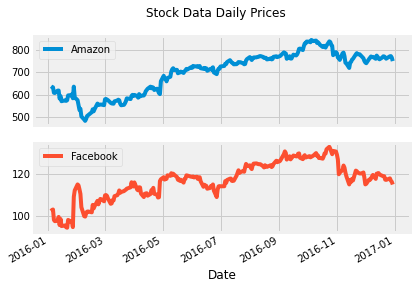

In [11]:
# Visualization
stocks.plot(subplots = True, title = 'Stock Data Daily Prices');

# Summarizing the data
stocks.describe()

## S&P 500 Daily Valuation

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


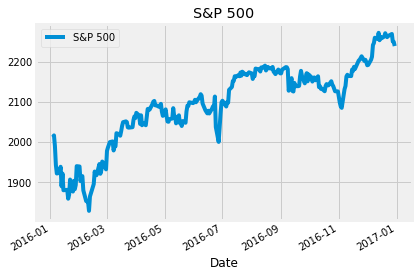

In [13]:
## Visualing the S&P 500

benchmark.plot(title = 'S&P 500')

# Summary

benchmark.describe()

As we can see

## Sharpe Ratio Inputs:

The Sharpe ratio uses a very particular input, the difference in returns between two investment opportunities. However, from the visualizations above, we only have the historical values. Thus we need to calculate the return, which is defined as the percentage change in value from one day to the next.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


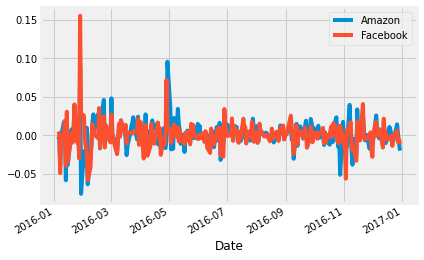

In [14]:
# Calculate daily stock returns
stock_returns = stocks.pct_change()

# Plotting the daily returns
stock_returns.plot()

# Summarize the daily returns
stock_returns.describe()

Interestingly, there is a massive spike of 0.16 (or 16%) return in late February/early March 2016.



## Calculating Daily Returns for the S&P 500

This works in exactly the same way as with Amazon and Facebook -- the only difference is that this data is a Series and so we select it as such using single brackets [ ] to faciliate later calculations


count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

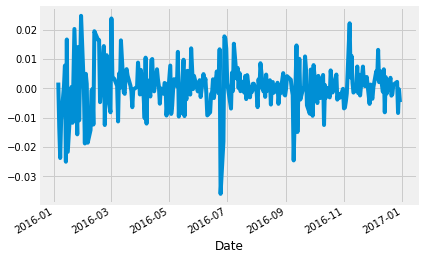

In [17]:
# Calculate daily S&P 500 returns
sp_returns = benchmark['S&P 500'].pct_change()

# Plot the daily returns
sp_returns.plot()

# Summarize the daily returns
sp_returns.describe()

We can immediately begin visually comparing the two graphs. The first thing I notice for example, is that the market did not have a massive uptick in late February 2016, so the large return is something that is definitely particular only to Facebook.

## Excess Returns for AMZN/FB versus the entire S&P 500

The next input needed for the Sharpe ratio is the relative performance of stocks against the benchmark. This is calculated as the difference in the returns for each day.

In our case: stock_returns versus sp_returns.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


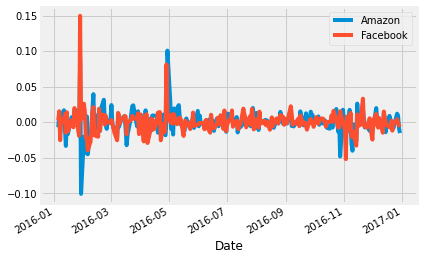

In [18]:
# Daily return difference 
excess_returns = stock_returns.sub(sp_returns, axis=0)

# Plotting the excess returns
excess_returns.plot();

# Summarizing the excess returns
excess_returns.describe()

## Calculating the Sharpe Ratio

To calculate the Sharpe Ratio, we calculate the average of the excess returns on a daily basis. This tells us how much, on average, the stock in question outperforms the benchmark, in terms of investment yield.

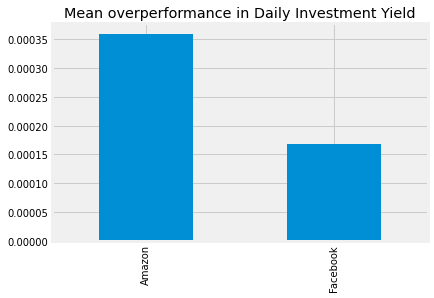

In [19]:
# Mean excess return per day over benchmark
avg_excess_return = excess_returns.mean()

# Plot avg_excess_returns
avg_excess_return.plot.bar(title = 'Mean overperformance in Daily Investment Yield')


Interesting! As we can see, Amazon outperforms the S&P on a daily basis more than Facebook. However, we need the standard deviation to calculate the actual amount of risk that these investments carry over investing into the S&P 500 (where the risk is pooled across all 500 stocks)

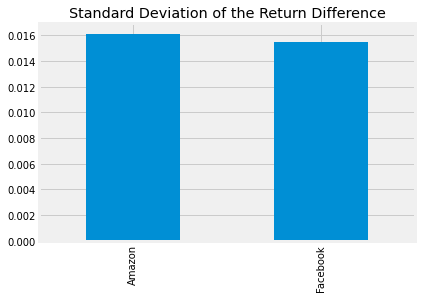

In [21]:
# Std Dev Calculation
sd_excess_return = excess_returns.std()

# Plotting
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference');

## Calculating the Sharpe Ratio

Beginning with the Sharpe Ratio formula:

\begin{equation}
S(x)=\frac{\left(r_{x}-R_{f}\right)}{S t d D e v\left(r_{x}\right)}
\end{equation}

**where:**  
  x = The Investment  
  $r_{x}$ = The average rate of return of x  
  $R_{f}$ = The best available rate of return of a risk-free security
  $StdDev(r_{x})$ = The standard deviation of $r_{x}$



The result of the Sharpe Ratio indicates how much more (or less!) return the investment yields per unit of risk.

The Sharpe ratio can be _annualized_ by multiplying it by the square root of the number of periods. This analysis uses daily data as input, so using the square root of the number of trading days (5 days x 52 weeks - holidays) = $\sqrt{252}$

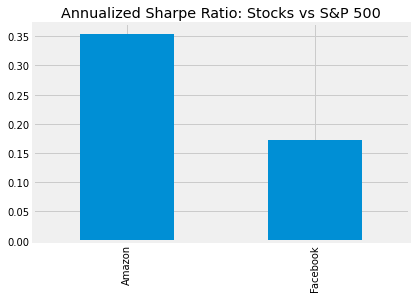

In [22]:
# Calculate daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# Annualize the Sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# Plot the annualized Sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500');

Above are the two annualized Sharpe Ratios for Facebook and Amazon when compared against the S&P 500. It clearly shows that, in 2016, Amazon had a Sharpe ratio twice as high as Facebook -- ergo, an investment in Amazon returned twice as much compared to the S&P 500 (for each unit of risk) that the investor took on.

Thus, in risk-adjusted terms, investing in Amazon is more attractive, at least for 2016.

When we look at the risk calculation using the standard deviation, they are extremely similar, but the daily returns differed significantly. Thus we can say that the difference in the Sharpe Ratios is driven primarily by differences in returns rather than difference in the risk profiles. 

This is why the Sharpe Ratio is useful: When we are faced with investment opportunities which offer different risks and returns, the Sharpe Ratio helps make that decision by allowing us to compare the returns adjusted to differences in the risk profiles. It essentially allows us to compare investment opportunities on equal terms.